<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS8_mixed_up_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:

import pandas as pd
# A variable:
my_var = 5

# A tuple
my_tuple = (5,10)
from collections import namedtuple
df=pd.read_csv("https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv")
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
pd.__version__

'0.23.4'

In [0]:
#!pip install pandas==0.23.4

In [0]:
import random
dir(random)  # a reminder of what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# A variable:
my_var = 5

# A tuple
my_tuple = (5,10)

#named tuples
from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User',['purchased','time_on_site','mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# desktop user has a base conversion liklihood of 10%
#and it goes up by 1% for each 15 seconds they spend on the site
# generate fake data
users = []
random.seed(42)
for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500) # will generate random squared
  users.append(User(purchased, time_on_site, False))

for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  # > comparison operator
  users.append(User(purchased, time_on_site, True)) # creates a user tuple which prints out
random.shuffle(users)
print(users[:10])


[User(purchased=False, time_on_site=150.42273427770718, mobile=False), User(purchased=True, time_on_site=284.06235530493245, mobile=True), User(purchased=True, time_on_site=140.37976895454653, mobile=True), User(purchased=True, time_on_site=49.206452507812216, mobile=True), User(purchased=False, time_on_site=167.81563803588924, mobile=True), User(purchased=False, time_on_site=20.484876517641524, mobile=True), User(purchased=False, time_on_site=167.3540069049869, mobile=True), User(purchased=False, time_on_site=447.75054592529114, mobile=False), User(purchased=True, time_on_site=57.93525538719398, mobile=True), User(purchased=True, time_on_site=292.6494305470663, mobile=True)]


In [0]:
# put this in a df to look at it
import pandas as pd
user_data = pd.DataFrame(users)
print(user_data.shape)
user_data.head

(1000, 3)


<bound method NDFrame.head of      purchased  time_on_site  mobile
0        False    150.422734   False
1         True    284.062355    True
2         True    140.379769    True
3         True     49.206453    True
4        False    167.815638    True
5        False     20.484877    True
6        False    167.354007    True
7        False    447.750546   False
8         True     57.935255    True
9         True    292.649431    True
10        True     70.303324    True
11        True    281.710649    True
12        True    195.534841    True
13       False    110.971802   False
14       False     10.718070    True
15        True    246.613773   False
16        True    228.020982   False
17       False     54.599149    True
18       False    360.766301   False
19        True    282.774061    True
20        True    305.345807   False
21        True    425.697383   False
22       False     37.170933    True
23       False    581.538525   False
24       False    189.233925    True
25      

In [0]:
print(random.random())
print(random.random())
print(random.random())
print(random.random())
print(random.random())
random.random()

0.04403790726280954
0.8629284949026113
0.24455145035670345
0.47176458957773815
0.3829794743673991


0.15008466824115008

In [0]:
print(df.shape)
df.head

(1200, 4)


<bound method NDFrame.head of       Unnamed: 0  age  weight  exercise_time
0              0   44     118            192
1              1   41     161             35
2              2   46     128            220
3              3   39     216             57
4              4   28     116            182
5              5   58     103            165
6              6   55     161            107
7              7   21     188             37
8              8   55     216             79
9              9   50     127            267
10            10   21     160            228
11            11   43     102             78
12            12   73     209             44
13            13   27     165             48
14            14   21     169            171
15            15   36     131            194
16            16   49     171            191
17            17   69     172            147
18            18   18     122            271
19            19   55     157            111
20            20   19    

In [0]:
# Put this in a visable dataframe
user_data = pd.DataFrame(users)
print(user_data.shape)
user_data.head()

(1000, 3)


,purchased,time_on_site,mobile
0,False,150.422734,False
1,True,284.062355,True
2,True,140.379769,True
3,True,49.206453,True
4,False,167.815638,True


In [0]:
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.789338167851291,5.836487686604824,7.267690340465448,7.280322437947023,7.733814701629437,7.772242279186957,7.994578759409748,8.373541587279558,9.106003254765849,9.38379653305911,9.615509927247123,9.848428900738856,10.23950442139964,10.337418715486669,10.586523414450706,10.718069679753153,10.997854148991385,11.012105109498041,11.706921559980145,12.091956561791557,12.382271645712285,12.75378790843838,12.995103670392169,13.370178930168896,15.920785346944974,16.135510245480567,16.75893133416585,16.773802946263586,16.868343577661772,17.362252869462687,17.479167161023454,17.922851319441314,18.36049180470949,18.567335759777762,19.359514766905985,19.468053978919983,19.833966879145127,20.484876517641524,20.710781715466965,20.814676916297277,...,513.5342908357718,515.4718990593212,517.1848861497105,518.3867964481467,518.4070711833585,520.1173607697788,524.578401914593,526.7532348231344,527.0568996188746,528.0256635303839,528.4459079156787,529.7098624749993,535.2695153363682,535.9412962281579,536.3859449458588,539.3527809076247,540.36553555062,542.6552719822238,543.3178572203369,548.4504252134441,549.5830779469206,561.9534019425959,564.1499127915823,564.814565730808,574.7557126020009,574.8174081072071,577.8952462993177,580.464571388533,581.5385253318037,581.7077917980032,582.5363605031145,582.9362427920347,588.8783154469735,590.65747470592,593.8187768755912,597.1381204299279,597.7116143416571,598.547187832115,599.088120104121,599.5766563635087
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,...,1,1,0,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1
True,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0


In [0]:
#list are 'mutable' - can be altered
my_list = [1,2,3,4,5]
my_list[3] = 10
print(my_list)
my_tuple = (4,20)
print(my_tuple[0])
new_tuple=(my_tuple[0],3)
print(new_tuple)

my_variable =5
print('variable value 5 = ',type(my_variable))
my_variable = 'string thingy'
print("my_variable value 'string thingy' =  ", type( my_variable))

[1, 2, 3, 10, 5]
4
(4, 3)
variable value 5 =  <class 'int'>
my_variable value 'string thingy' =   <class 'str'>


In [0]:
# Use crosstabulation to see what is going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.789338167851291,5.836487686604824,7.267690340465448,7.280322437947023,7.733814701629437,7.772242279186957,7.994578759409748,8.373541587279558,9.106003254765849,9.38379653305911,9.615509927247123,9.848428900738856,10.23950442139964,10.337418715486669,10.586523414450706,10.718069679753153,10.997854148991385,11.012105109498041,11.706921559980145,12.091956561791557,12.382271645712285,12.75378790843838,12.995103670392169,13.370178930168896,15.920785346944974,16.135510245480567,16.75893133416585,16.773802946263586,16.868343577661772,17.362252869462687,17.479167161023454,17.922851319441314,18.36049180470949,18.567335759777762,19.359514766905985,19.468053978919983,19.833966879145127,20.484876517641524,20.710781715466965,20.814676916297277,...,513.5342908357718,515.4718990593212,517.1848861497105,518.3867964481467,518.4070711833585,520.1173607697788,524.578401914593,526.7532348231344,527.0568996188746,528.0256635303839,528.4459079156787,529.7098624749993,535.2695153363682,535.9412962281579,536.3859449458588,539.3527809076247,540.36553555062,542.6552719822238,543.3178572203369,548.4504252134441,549.5830779469206,561.9534019425959,564.1499127915823,564.814565730808,574.7557126020009,574.8174081072071,577.8952462993177,580.464571388533,581.5385253318037,581.7077917980032,582.5363605031145,582.9362427920347,588.8783154469735,590.65747470592,593.8187768755912,597.1381204299279,597.7116143416571,598.547187832115,599.088120104121,599.5766563635087
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,...,1,1,0,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1
True,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0


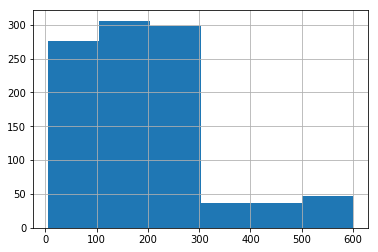

In [0]:
user_data['time_on_site'].hist(bins=6);

In [0]:
# time is continous! Needs to be in discrete buckets
# pandas calls these bins, and panddas.cut helps make them
time_bins = pd.cut(user_data['time_on_site'], 6)
crosstabs= pd.crosstab(user_data['purchased'], time_bins)
crosstabs

time_on_site,"(5.196, 104.754]","(104.754, 203.718]","(203.718, 302.683]","(302.683, 401.648]","(401.648, 500.612]","(500.612, 599.577]"
purchased,,,,,,
False,188,210,164,23,21,30
True,88,96,134,13,16,17


##Revert to Pandas 0.23.4

In [0]:
print(pd.__version__)

0.23.4


In [0]:
#!pip install pandas==0.23.4

In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(5.196, 104.754]","(104.754, 203.718]","(203.718, 302.683]","(302.683, 401.648]","(401.648, 500.612]","(500.612, 599.577]"
purchased,,,,,,
False,0.681159,0.686275,0.550336,0.638889,0.567568,0.638298
True,0.318841,0.313725,0.449664,0.361111,0.432432,0.361702


In [0]:
# counter to our hypothesis that having more time will give fewer purchases.
# although, we know why, lets look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.704,0.613333
True,0.296,0.386667


In [0]:
#yep, mobile users are more likely to buy things
# But we're still not seeing the 'whole' story untill we look at all 3 at once

#Live/stretch goal - how can we do that?

In [0]:
pd.crosstab(user_data['purchased'], [time_bins, user_data['mobile' ]], normalize='columns')

time_on_site (5.196, 104.754]        ...         (500.612, 599.577]
mobile                  False        ...                      False
purchased                            ...                           
False                0.891892        ...                   0.638298
True                 0.108108        ...                   0.361702

[2 rows x 9 columns]

In [0]:
pd.crosstab(time_bins,[user_data['purchased'], user_data['mobile']], normalize='columns')

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(5.196, 104.754]    0.187500  0.336957  0.054054  0.289655
(104.754, 203.718]  0.227273  0.369565  0.081081  0.310345
(203.718, 302.683]  0.164773  0.293478  0.243243  0.400000
(302.683, 401.648]  0.130682  0.000000  0.175676  0.000000
(401.648, 500.612]  0.119318  0.000000  0.216216  0.000000
(500.612, 599.577]  0.170455  0.000000  0.229730  0.000000

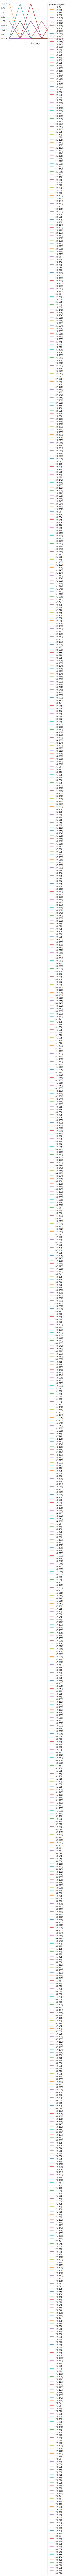

In [0]:
crosstab.plot()

In [0]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(5.196, 104.754]    0.187500  0.336957  0.054054  0.289655
(104.754, 203.718]  0.227273  0.369565  0.081081  0.310345
(203.718, 302.683]  0.164773  0.293478  0.243243  0.400000
(302.683, 401.648]  0.130682  0.000000  0.175676  0.000000
(401.648, 500.612]  0.119318  0.000000  0.216216  0.000000
(500.612, 599.577]  0.170455  0.000000  0.229730  0.000000

In [0]:
ct_final = ct.iloc[:, [2,3]]
ct_final

purchased               True          
mobile                 False     True 
time_on_site                          
(5.196, 104.754]    0.054054  0.289655
(104.754, 203.718]  0.081081  0.310345
(203.718, 302.683]  0.243243  0.400000
(302.683, 401.648]  0.175676  0.000000
(401.648, 500.612]  0.216216  0.000000
(500.612, 599.577]  0.229730  0.000000

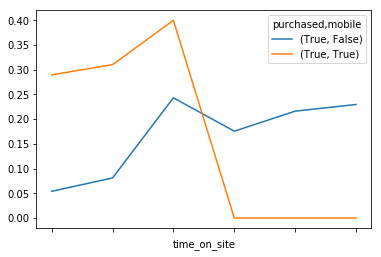

In [0]:
ct_final.plot()

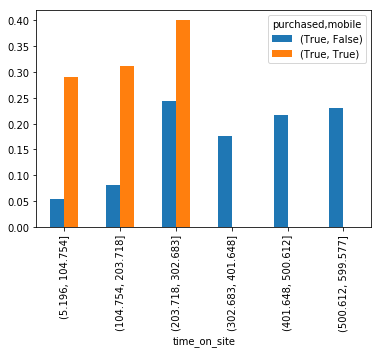

In [0]:
ct_final.plot(kind='bar');

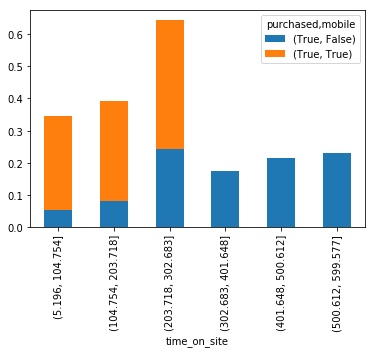

In [0]:
ct_final.plot(kind='bar', stacked=True);

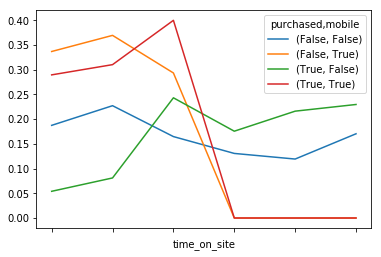

In [0]:
ct.plot();

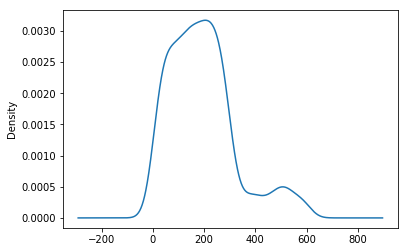

In [0]:
user_data['time_on_site'].plot.density();

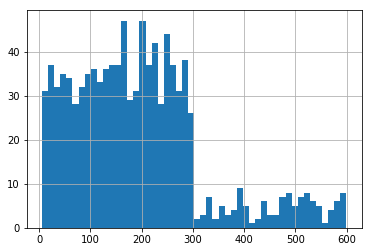

In [0]:
user_data['time_on_site'].hist(bins=50);

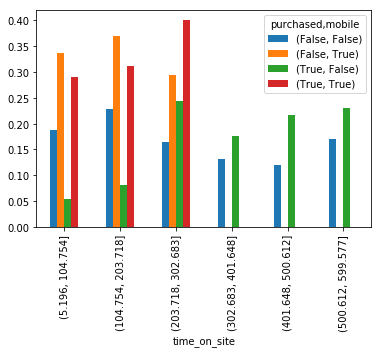

In [0]:
ct.plot(kind='bar')

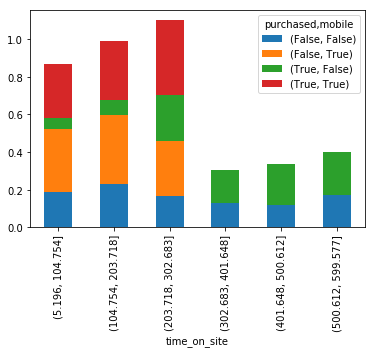

In [0]:
ct.plot(kind='bar', stacked=True)

In [0]:
pt=pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(5.196, 104.754]",0.318841
"(104.754, 203.718]",0.313725
"(203.718, 302.683]",0.449664
"(302.683, 401.648]",0.361111
"(401.648, 500.612]",0.432432
"(500.612, 599.577]",0.361702


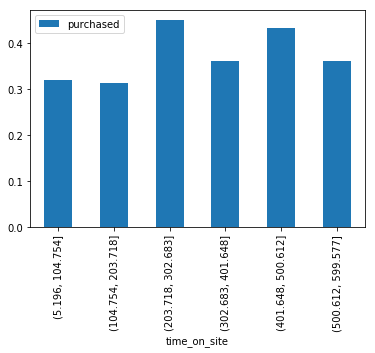

In [0]:
pt.plot.bar()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

  - id = spurious variable 
  - age = X variable predited
  - weight= confounding variable
  - excersixe time = Y Variable dependent

2.  Y variable depends on the X variable
  - How long one can execise depends on ones age.

3.  Which relationships are "real", and which spurious?

  - age and munites of execise are real
  - age and weight are real

  - execise and weight are spurious
  - id relationship with any other is also spurious

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)